## Pasos a seguir para llevar a cabo la limpieza y análisis de datos

- Tipos de variables y forma de la tabla de datos
 - .info()
 - .shape
 - .head() / .tail() / .sample()
 - .columns

- Búsqueda y corrección de valores perdidos (missing)
 - .info()
 - .isnull()
 - .isna()
 - .fillna() / .bfill() / .ffill()
 - .dropna()

- Búsqueda valores extremos(outlier): Ver si alguna de nuestras variables toma valores por encima de los normal
 - .boxplot()
 - .scatterplot()
 - .describe(percentiles=[ ])

- Corrección valores variables: valores extraños (!, @, #, %...) y Homogeneización valores variables, como en el caso de GENDER (female, Female, Fem...)
 - .split()
 - .str.replace()
 - .loc / .iloc[ ]
 - .astype()
 - .drop_duplicates()
 - .drop(axis=1)
 - .ceil() / .floor() /.round()

- Análisis exploratorio: Ver cómo son nuestras variables, su distribución (Librerías seaborn, matplotlib y plotly)
 - .describe()
 - .groupby()
 - .pivot_table()
 - .boxplot()
 - .scatterplot()
 - .histplot()
 - .boxplot()
 - .barplot()


- Ingeniería de variables

Una vez hemos corregido, homogeneizado, aclarado... los valores de nuestras variables, podemos buscar cómo optimizarlas, creando combinaciones entre ellas, categorizaciones... Aplicando, también, algunas de las funciones y métodos arriba utilizados.

Definir:
 - Tamaño casa: grande, pequeña...Teniendo en cuenta no solo la variable sqft
 - Tamaño vs veciondario
 - categoria precio: cara, barata... 
 
 `pd.qcut(df['precio'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])` 
 
 `pd.cut(df['precio'], bins=bins, labels=labels, include_lowest=True)`

 - Precio comparado con condition/grade
 - Definir si es apartamento, casa, casa con jardín... en función de si tiene basement, floors...

## Importar librerias

In [20]:
# Para dataframes
import pandas as pd
import numpy as np

# Para visualizaciones
import seaborn as sns
sns.set() # Embellecer gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import keplergl
import geopandas as gpd

# pd.set_option('display.max_columns',None)      # Ver todas las columnas
# plt.style.use('dark_background')               # fondo de las visualizaciones

# Para extraccion de datos Web
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

# Datetimes
import datetime as dt

# Eliminar warnings
import warnings
warnings.filterwarnings("ignore")


### Importamos datos penguins para ver ejemplos durante la guía

In [186]:
penguins = sns.load_dataset("penguins")

In [195]:
df = pd.read_csv('../Data/House Pricing.csv', sep = ';')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,coord
0,7895500070,2/13/15,4,1.00,1220,8075,1.0,0,0,2,...,330,1969,0,98001,47.3341,-122.282,1290,7800,240000,"(47.3341,-122.282)"
1,3717000160,10/09/2014,4,2.50,2240,4648,2.0,0,0,3,...,0,2005,0,98001,47.3378,-122.257,2221,4557,287000,"(47.3378,-122.257)"
2,8961960160,10/28/14,4,2.50,3230,16171,2.0,0,3,3,...,710,2001,0,98001,47.3183,-122.253,2640,8517,480000,"(47.3183,-122.253)"
3,4014400292,1/14/15,3,2.50,2714,17936,2.0,0,0,3,...,0,2005,0,98001,47.3185,-122.275,2590,18386,465000,"(47.3185,-122.275)"
4,1115450240,10/22/14,4,2.50,2160,9528,2.0,0,0,3,...,0,1992,0,98001,47.3341,-122.255,2280,9937,360000,"(47.3341,-122.255)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2770601912,04/02/2015,3,3.25,1550,1280,2.0,0,0,3,...,330,2013,0,98199,47.6493,-122.384,1550,1579,570000,"(47.6493,-122.384)"
21593,1070000180,10/15/14,4,3.50,3660,4760,2.0,0,0,3,...,820,2014,0,98199,47.6482,-122.409,3210,4640,1110000,"(47.6482,-122.409)"
21594,7010700308,11/12/2014,4,3.25,3610,4000,2.0,0,0,3,...,970,2007,0,98199,47.6580,-122.396,1980,4000,1010000,"(47.658,-122.396)"
21595,2770601782,08/01/2014,3,2.50,1510,1618,2.5,0,0,3,...,180,2011,0,98199,47.6515,-122.384,1350,1397,453000,"(47.6515,-122.384)"


## Tipos de variables y forma de la tabla de datos

 - .info()
 - .shape
 - .head() / .tail() / .sample()
 - .columns

el método info nos indica el número de líneas y columnas, los nombres de las variables y sus tipos (object, int, float...)

In [24]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


shape nos muestra una tupla con el número de filas y de columnas

In [6]:
penguins.shape

(344, 7)

Los métodos head, tail y sample muestran una pequeña porción de los datos.

In [41]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [44]:
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
78,Adelie,Torgersen,36.2,16.1,187.0,3550.0,Female
228,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,Female
316,Gentoo,Biscoe,49.4,15.8,216.0,4925.0,Male
59,Adelie,Biscoe,37.6,19.1,194.0,3750.0,Male
93,Adelie,Dream,39.6,18.1,186.0,4450.0,Male


Nombres de las columnas, muy útil para ver bien los nombres. En ocasiones también útil para tener esos nombres almacenados en una lista

In [8]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

## Búsqueda y corrección de valores perdidos (missing)

 - .info() obtenemos la información general del df: número de filas y columnas, tipo de columnas, y cuenta de valores no-nulos
 - .isnull() devuelve True/False si la observación es Null
 - .isna()
 - .fillna() / .bfill() / .ffill(): Rellenamos Nulls usando diferentes métodos
 - .dropna(): Elimina si encuentra Null

`.isnull()` devuelve True o False en función de si es Null. Si hacemos la suma nos da el número total de nulos, ya que True suma 1 y False suma 0

In [187]:
# A continuación obtenemos la suma de los valores perdidos en una variable en concreto
print(penguins['bill_length_mm'].isnull().sum())
print(penguins['bill_length_mm'].isna().sum())

2
2


con fillna rellenamos por un valor fijo, en este caso 0. Como vemos la suma ahora nos da 0

In [188]:
# Habiendo rellenado por 0, ya no quedan Nulls
print(penguins['bill_length_mm'].fillna(0).isnull().sum())

0


Rellenamos los valores perdidos usando la media

In [ ]:
# Rellenamos usando la media
print(penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean()).isnull().sum())
# penguins.loc[penguins['bill_length_mm'].isnull(), ]


Para ser más precisos rellenamos con la media pero teniendo en cuenta la especie, ya que sabemos que existen ciertas diferencias.

Con la primera ejecución vemos las 3 medias, por especie. A continuación hacemos `.fillna` usando esas medias, a través de `.map` "mapeamos" el vamor de la media y lo asociamos según la especie.

In [189]:
spmean=penguins.groupby('species')['bill_length_mm'].mean()
spmean

species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: bill_length_mm, dtype: float64

In [190]:
penguins['bill_length_mm']=penguins['bill_length_mm'].fillna(penguins['species'].map(spmean))

Vemos con el head anterior que la línea 3 ha sido rellenada con la media de Adelie

In [191]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.500000,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.300000,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,38.791391,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.700000,19.3,193.0,3450.0,Female


Los métodos `bfill` y `ffill` rellenan en función de los valores cercanos. 

`bfill` usa la siguiente observación válida al valor nulo para rellenar

`ffill` propaga el valor de la última observación válida

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ffill.html#pandas.DataFrame.ffill

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.bfill.html#pandas.DataFrame.bfill

In [73]:
# Usando fbfill (forwardfill) el valor de la observación 2 lo imputamos en la 3
penguins['bill_length_mm'].ffill().head()

0    39.1
1    39.5
2    40.3
3    40.3
4    36.7
Name: bill_length_mm, dtype: float64

In [192]:
# El valor de la observacion 4 lo imputamos en la 3
penguins['bill_length_mm'].bfill().head()

0    39.100000
1    39.500000
2    40.300000
3    38.791391
4    36.700000
Name: bill_length_mm, dtype: float64

Si hacemos dropna del dataset entero va a eliminar todas las líneas que contengan algun Null

tenemos la opción how, que si lo parametrizamos como `'any'` va a eliminar las líneas que contengan algún NaN. con `'all'` va a requerir que todas los valores de esa línea sean NaN para eliminar la línea

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna

En el ejemplo de a continuación vemos como la observación 3 ha desaparecido.

In [87]:
penguins['bill_length_mm'].dropna()


0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 342, dtype: float64

## Búsqueda valores extremos(outlier): 

Ver si alguna de nuestras variables toma valores por encima de los normal
 - .boxplot()
 - .scatterplot()
 - .describe(percentiles=[ ])

Un valor outlier es uno que toma un valor muy alto o bajo con respecto al resto de observaciones, comparado con lo esperable. Dicho esto, que exista un valor muy extremo no significa que sea erróneo, puede ser perfectamente explicable.

Ahora bien, que el valor extremo esté justificado tampoco significa que debamos dejarlo como tal, ya que puede afectar a nuestros análisis, especialmente a cuando calculamos la media. Una alternativa es limitarlo al percentil 99 ó 95 (ó 5), que sigue siendo alto pero no distorsiona tanto.

A continuación vemos algún ejemplo de errores por valor extremo y analizamos si lo corregimos o no.

Vemos que hay una casa con 33 habitaciones!! como la casa solo tiene 1 habitación y 1600 sqft, lo consideramos erróneo, ya que lo lógico sería que una casa con tanta habitación fuera más grande.

Lo más probable es que haya sido un error tipográfico, quien imputó la información introdujo 33 en vez de 3.



In [107]:
df[['bedrooms','bathrooms','sqft_living']].describe(percentiles=[0.01,.05,.1,.25,.5,.75,.9,.95,.99])

,bedrooms,bathrooms,sqft_living
count,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850
std,0.926299,0.768984,918.106125
min,1.000000,0.500000,370.000000
1%,2.000000,1.000000,720.000000
5%,2.000000,1.000000,940.000000
10%,2.000000,1.000000,1090.000000
25%,3.000000,1.750000,1430.000000
50%,3.000000,2.250000,1910.000000
75%,4.000000,2.500000,2550.000000


In [196]:
df[['bedrooms','sqft_living','bathrooms']][df['bedrooms']==33]

,bedrooms,sqft_living,bathrooms
13119,33,1620,1.75


In [198]:
df.loc[df['bedrooms']==33, 'bedrooms'] = 3
df[['bedrooms','sqft_living','bathrooms']][df['bedrooms']==33]

,bedrooms,sqft_living,bathrooms


Analizamos los posibles outliers en sqft_living, para ello pintamos un gráfico de dispersión como el boxplot. Una manera de definir outliers es localizar aquellos por encima o por debajo de los bigotes.

El caso más extremo, tenemos una casa con 13k sqft_living, valor 7 veces(aprox) por encima de la media. Vamos a ver si tiene sentido o lo tomamos por erróneo.

Para ello vemos otras dimensiones de la casa o su precio.



#### Box plot definicion

https://es.wikipedia.org/wiki/Diagrama_de_caja

La caja estaá definida por el Q1 y el Q3

El bigote superior= q3 + 1.5*IQR (InterquartileRange=Q3-Q1)

El bigote inferior= q1 - 1.5*IQR

------ Otro criterio para definir los bigotes

el bigote superior= p95, y el bigote inferio=p05

---- ¿Por que no son simétricas las distancias entre los bigotes y la caja? En este caso se da esa situación porque el mínimo es 370 y no hay más valores bajos, están todos acumulados ahí (los valores bajos)

In [117]:
px.box(df['sqft_living'])

Hacemos zoom de esa casa en concreto y, comparando con otras características de la vivienda, consideramos si está justificado o no.

La casa tiene 7 habitaciones, 8 baños y un precio de $2.2M, valores normales para una casa tan grande. Por lo tanto consideramos este valor como elevado pero no es erróneo y de momento no vamos a hacer nada con él. No obstante, una corrección que podríamos aplicarle es limitar el valor de sqft_living al bigote superior, 4230, que como vemos en el `.describe()` anterior, estaría entre los percentiles 95 y 99

In [121]:
df[df['sqft_living']>13000]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,coord
8816,1225069038,05/05/2014,7,8.0,13540,307752,3.0,0,4,3,...,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000,"(47.6675,-121.986)"


2025-03-05 19:09:46,820 - INFO     - Executing shutdown due to inactivity...
2025-03-05 19:09:50,909 - INFO     - Executing shutdown...


No así con la vivienda de 33 habitaciones, que como vimos anteriormente aparentemente es un error tipográfico, ya que no tiene sentido una casa de 640k$ y 1 baño con 33 habitaciones. Debería ser corregido a 3 habitaciones

In [124]:
px.scatter(df, x='bedrooms',y='price')

En el siguiente gráfico de dispersión podemos comparar las distribuciones de precio y sqft_living. Hay una serie de casas muy hacia la derecha(valores altos de sqft_living) y/o muy hacia arriba (valores altos de precio).

Deberíamos considerarlos outliers? deberíamos eliminarlos o hacerles algún tipo de tratamiento?

En este caso tenemos muchas casas de muchos tipos diferentes, grandes y pequeñas, en barrios más o menos céntricos, con y sin vistas, reformados y no... Con estas grandes diferencias el gráfico de a continuación se quedaría corto para responder a esa pregunta. Lo idóneo sería categorizar o segmentar el dataset entero por estas variables más significativas.

en cualquier caso, si no pudiéramos segmentar los datos, las casas más grandes (> p99 sqft) y las más caras (> p99 $M) deberían ser eliminadas en los análisis exploratorios, pues podrían "contaminar" las conclusiones.

In [130]:
px.scatter(df, x='sqft_living',y='price')

## Corrección valores variables: 

valores extraños (!, @, #, %...) y Homogeneización valores variables, como en el caso de GENDER (female, Female, Fem...)
 - .split()
 - .str.replace()
 - .loc / .iloc[ ]
 - .astype()
 - .drop_duplicates()
 - .drop(axis=1)
 - .ceil() / .floor() /.round()
 - try except

el método `.split()` divide nuestra variable por un símbolo en tantas otras como separaciones surjan

In [200]:
df['year'] = df['date'].str.split('/', expand=True)[2]
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,coord,date2,year
0,7895500070,2/13/15,4,1.0,1220,8075,1.0,0,0,2,...,0,98001,47.3341,-122.282,1290,7800,240000,"(47.3341,-122.282)",2-13-15,15
1,3717000160,10/09/2014,4,2.5,2240,4648,2.0,0,0,3,...,0,98001,47.3378,-122.257,2221,4557,287000,"(47.3378,-122.257)",10-09-2014,2014
2,8961960160,10/28/14,4,2.5,3230,16171,2.0,0,3,3,...,0,98001,47.3183,-122.253,2640,8517,480000,"(47.3183,-122.253)",10-28-14,14
3,4014400292,1/14/15,3,2.5,2714,17936,2.0,0,0,3,...,0,98001,47.3185,-122.275,2590,18386,465000,"(47.3185,-122.275)",1-14-15,15
4,1115450240,10/22/14,4,2.5,2160,9528,2.0,0,0,3,...,0,98001,47.3341,-122.255,2280,9937,360000,"(47.3341,-122.255)",10-22-14,14


`.Replace()` reemplaza un símbolo por otro en caso de que exista, en cada línea de la columna indicada. Se le debe poner antes el método `.str` para que lo interprete como un string

In [199]:
df['date2'] =df['date'].str.replace('/','-')
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,coord,date2
0,7895500070,2/13/15,4,1.0,1220,8075,1.0,0,0,2,...,1969,0,98001,47.3341,-122.282,1290,7800,240000,"(47.3341,-122.282)",2-13-15
1,3717000160,10/09/2014,4,2.5,2240,4648,2.0,0,0,3,...,2005,0,98001,47.3378,-122.257,2221,4557,287000,"(47.3378,-122.257)",10-09-2014
2,8961960160,10/28/14,4,2.5,3230,16171,2.0,0,3,3,...,2001,0,98001,47.3183,-122.253,2640,8517,480000,"(47.3183,-122.253)",10-28-14
3,4014400292,1/14/15,3,2.5,2714,17936,2.0,0,0,3,...,2005,0,98001,47.3185,-122.275,2590,18386,465000,"(47.3185,-122.275)",1-14-15
4,1115450240,10/22/14,4,2.5,2160,9528,2.0,0,0,3,...,1992,0,98001,47.3341,-122.255,2280,9937,360000,"(47.3341,-122.255)",10-22-14


Método `.loc` e `.iloc` nos ayudan a localizar por fila y columna, para filtrar o para imputar condición y sentencia. Como en los ejemplos siguientes, en los que usamos `.loc` para filtrar por las casas más grandes de 13000 sqft, y para corregir la variable bedrooms, de 33 a 3.

También usamos `.iloc` para localizar esa observación de sqft > 13000. Indicándole que muestre todas las filas `:` y la cuarta columna, cuando ésta es >13000

con `.iloc` y los corchetes podemos acotar las dimensiones de nuestros dataframes

In [140]:
df.loc[df['sqft_living']>13000]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,coord,year,date2
8816,1225069038,05/05/2014,7,8.0,13540,307752,3.0,0,4,3,...,0,98053,47.6675,-121.986,4850,217800,2280000,"(47.6675,-121.986)",2014,05-05-2014


In [142]:
df.loc[df['bedrooms']==33, 'bedrooms'] = 3
df[df['bedrooms']==33]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,coord,year,date2


In [161]:
df[df.iloc[:,4]>13000]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,price,coord,year,date2,bathrooms2,bathrooms_up,bathrooms_down,bathrooms_round
8816,1225069038,05/05/2014,7,8.0,13540,307752,3.0,0,4,3,...,4850,217800,2280000,"(47.6675,-121.986)",2014,05-05-2014,8.0,8.0,8.0,8.0


In [163]:
df.iloc[:,4:6]

,sqft_living,sqft_lot
0,1220,8075
1,2240,4648
2,3230,16171
3,2714,17936
4,2160,9528
...,...,...
21592,1550,1280
21593,3660,4760
21594,3610,4000
21595,1510,1618


Los métodos `np.ceil`, `np.floor`y `round` sirven para redondear hacia arriba, hacia bajo y establecer el número de decimales, respectivamente.

In [147]:
df['bathrooms_up']=np.ceil(df['bathrooms'])
df['bathrooms_down']=np.floor(df['bathrooms']) # redondear hacia abajo
df['bathrooms_round']=df['bathrooms'].round(3)
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,price,coord,year,date2,bathrooms2,bathrooms_up,bathrooms_down,bathrooms_round
0,7895500070,2/13/15,4,1.00,1220,8075,1.0,0,0,2,...,1290,7800,240000,"(47.3341,-122.282)",15,2-13-15,1.0,1.0,1.0,1.00
1,3717000160,10/09/2014,4,2.50,2240,4648,2.0,0,0,3,...,2221,4557,287000,"(47.3378,-122.257)",2014,10-09-2014,3.0,3.0,2.0,2.50
2,8961960160,10/28/14,4,2.50,3230,16171,2.0,0,3,3,...,2640,8517,480000,"(47.3183,-122.253)",14,10-28-14,3.0,3.0,2.0,2.50
3,4014400292,1/14/15,3,2.50,2714,17936,2.0,0,0,3,...,2590,18386,465000,"(47.3185,-122.275)",15,1-14-15,3.0,3.0,2.0,2.50
4,1115450240,10/22/14,4,2.50,2160,9528,2.0,0,0,3,...,2280,9937,360000,"(47.3341,-122.255)",14,10-22-14,3.0,3.0,2.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2770601912,04/02/2015,3,3.25,1550,1280,2.0,0,0,3,...,1550,1579,570000,"(47.6493,-122.384)",2015,04-02-2015,4.0,4.0,3.0,3.25
21593,1070000180,10/15/14,4,3.50,3660,4760,2.0,0,0,3,...,3210,4640,1110000,"(47.6482,-122.409)",14,10-15-14,4.0,4.0,3.0,3.50
21594,7010700308,11/12/2014,4,3.25,3610,4000,2.0,0,0,3,...,1980,4000,1010000,"(47.658,-122.396)",2014,11-12-2014,4.0,4.0,3.0,3.25
21595,2770601782,08/01/2014,3,2.50,1510,1618,2.5,0,0,3,...,1350,1397,453000,"(47.6515,-122.384)",2014,08-01-2014,3.0,3.0,2.0,2.50


**control de excepciones**, es un sistema de condición-sentencia, similar a if:else, salvo que en este caso la condición es que no haya error en la ejecución, en tal caso se realizaría la acción que indica el except.

Es útil cuando a veces nos dan errores que no podemos gestionar o corregir pero queremos que la ejecución continue normalmente.

https://www.w3schools.com/python/python_try_except.asp

In [ ]:
try:
    df['bathrooms']=df['bathrooms'].round(3)
except:
    df['bathrooms']=np.ceil(df['bathrooms'])

## Análisis exploratorio: 

Ver cómo son nuestras variables, su distribución (Librerías seaborn, matplotlib y plotly)
 - .describe()
 - .groupby()
 - .pivot_table()
 - .boxplot()
 - .scatterplot()
 - .histplot()
 - .barplot()
 
El análisis exploratorio comprende un conjunto de técnicas que nos ayudan a entender cómo son nuestros datos. Qué tipos de variables tenemos, cómo se distribuyen, si existen diferencias en alguna variable numérica entre categorías de otra discreta. A parte de ayudarnos a localizar casos extremos, como hemos visto anteriormente.

`pd.pivot_table` es una manera de representar los datos de manera agruapda, como un groupby, pero ofreciendo más manejabilidad.

Introducimos los parámetros df, index, columns y aggfunc. 

Index representa lo que sería el By en el groupby, la variable discreta por la que vamos a calcular las métricas. Igualmente ocurre con columns pero de manera traspuesta. 

`.aggfunc` =['mean','sum','max','count'...] son las métricas que queremos calcular

`margins` nos devuelve los valores marginales, es decir sin tener en cuenta `year` en el caso de las filas, ni `condition` en el caso de las columnas.

`fill_value` Permite gestionar los posibles nulos que salgan en la tabla resultante

https://www.geeksforgeeks.org/python-pandas-pivot_table/

In [203]:
pd.pivot_table(df[['price','sqft_living', 'condition','year']], index='condition', columns='year', aggfunc='mean', 
               margins = True, fill_value = 0).round(1)

price                                         sqft_living  \
year             14        15      2014      2015       All          14   
condition                                                                 
1          304850.0  350833.3  261306.2  529400.0  341067.2      1365.0   
2          333619.8  336275.5  286509.8  374754.0  328178.8      1479.6   
3          537189.2  536946.3  544397.7  560983.2  542173.1      2157.9   
4          514047.2  527576.8  532229.1  514333.4  521374.5      1956.8   
5          595176.0  617101.2  634672.0  615213.5  612577.7      2002.4   
All        534394.9  536934.2  547088.3  550116.7  540296.6      2086.0   

                                           
year           15    2014    2015     All  
condition                                  
1           980.0  1342.5  1184.0  1247.9  
2          1303.3  1470.0  1414.0  1420.8  
3          2094.5  2186.1  2132.9  2149.2  
4          1926.5  1991.8  1888.9  1951.4  
5          1999.1  2079.2  1976.7  2022.9  
All        2036.3  2118.6  2049.7  2080.3

`groupby` a priori es más sencilla su programación y tiene un mejor rendimiento, a continuación vemos un ejemplo.

Sin embargo, `pivot_table` es más flexible, permite más niveles de indexación (filas y columnas), permite sacar las marginales y gestionar nulls (Cuando una categoría en concreto no tiene observaciones)

In [202]:
df[['price','sqft_living', 'condition','year']].groupby(['condition'])['price','sqft_living'].agg(['mean'])

,price,sqft_living
,mean,mean
condition,,
1,341067.241379,1247.931034
2,328178.758824,1420.823529
3,542173.057347,2149.205492
4,521374.450414,1951.408843
5,612577.742504,2022.911229


`barplot` nos permite analizar de un solo vistazo cómo se comporta price en función de condition. Por ejemplo vemos que hay grandes diferencias entre las condiciones 1 y 2 por un lado, 3,4 y 5 por el otro. También observamos que condition=1 tiene una gran dispersión, o sea que hay casas muy baratas.

<AxesSubplot:xlabel='condition', ylabel='price'>

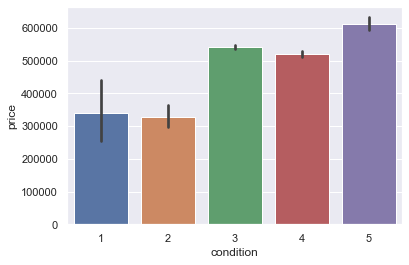

In [214]:
sns.barplot(data=df[['price','year','condition']], x = 'condition', y='price')

## Ingeniería de variables

Una vez hemos corregido, homogeneizado, aclarado... los valores de nuestras variables, podemos buscar cómo optimizarlas, creando combinaciones entre ellas, categorizaciones... Aplicando, también, algunas de las funciones y métodos arriba utilizados.

Definir:
 - Tamaño casa: grande, pequeña...Teniendo en cuenta no solo la variable sqft
 - Tamaño vs veciondario
 - categoria precio: cara, barata... 
 
 `pd.qcut(df['precio'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])` 
 
 `pd.cut(df['precio'], bins=bins, labels=labels, include_lowest=True)`

 - Precio comparado con condition/grade
 - Definir si es apartamento, casa, casa con jardín... en función de si tiene basement, floors...



`kpi_tamaño` nos permite ver si la vivienda es grande o pequeña en relación a su vecindario.

Lo primero que debemos hacer cuando creamos una nueva variable es ver su `.describe()`, para ver su comportamiento y si la hemos definido bien.

In [164]:
df['kpi_tamaño'] = df['sqft_living'] / df['sqft_living15']
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,price,coord,year,date2,bathrooms2,bathrooms_up,bathrooms_down,bathrooms_round,kpi_tamaño
0,7895500070,2/13/15,4,1.00,1220,8075,1.0,0,0,2,...,7800,240000,"(47.3341,-122.282)",15,2-13-15,1.0,1.0,1.0,1.00,0.945736
1,3717000160,10/09/2014,4,2.50,2240,4648,2.0,0,0,3,...,4557,287000,"(47.3378,-122.257)",2014,10-09-2014,3.0,3.0,2.0,2.50,1.008555
2,8961960160,10/28/14,4,2.50,3230,16171,2.0,0,3,3,...,8517,480000,"(47.3183,-122.253)",14,10-28-14,3.0,3.0,2.0,2.50,1.223485
3,4014400292,1/14/15,3,2.50,2714,17936,2.0,0,0,3,...,18386,465000,"(47.3185,-122.275)",15,1-14-15,3.0,3.0,2.0,2.50,1.047876
4,1115450240,10/22/14,4,2.50,2160,9528,2.0,0,0,3,...,9937,360000,"(47.3341,-122.255)",14,10-22-14,3.0,3.0,2.0,2.50,0.947368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2770601912,04/02/2015,3,3.25,1550,1280,2.0,0,0,3,...,1579,570000,"(47.6493,-122.384)",2015,04-02-2015,4.0,4.0,3.0,3.25,1.000000
21593,1070000180,10/15/14,4,3.50,3660,4760,2.0,0,0,3,...,4640,1110000,"(47.6482,-122.409)",14,10-15-14,4.0,4.0,3.0,3.50,1.140187
21594,7010700308,11/12/2014,4,3.25,3610,4000,2.0,0,0,3,...,4000,1010000,"(47.658,-122.396)",2014,11-12-2014,4.0,4.0,3.0,3.25,1.823232
21595,2770601782,08/01/2014,3,2.50,1510,1618,2.5,0,0,3,...,1397,453000,"(47.6515,-122.384)",2014,08-01-2014,3.0,3.0,2.0,2.50,1.118519


In [165]:
df['kpi_tamaño'].describe()

count    21597.000000
mean         1.053144
std          0.320311
min          0.187279
25%          0.881188
50%          1.000000
75%          1.161039
max          6.000000
Name: kpi_tamaño, dtype: float64

a continuación vamos a categorizar precio siguiendo dos lógicas ligeramente diferentes. La primera según su distribución en percentiles, con el método `pd.qcut()`, el parámetro `q` indica cuántas divisiones queremos.

Al ser una variable categórica lo primero que vemos a continuación es el `value_counts()`, para confirmar que se realizaron las divisiones que queríamos y comprobar que todas tienen más o menos el mismo número de observaciones.

In [217]:
df['precio_cat'] = pd.qcut(df['price'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])
df['precio_cat'].value_counts()

Medio       5445
Bajo        5406
Alto        5375
Muy Alto    5371
Name: precio_cat, dtype: int64

A continuación vamos a ser nosotros los que definamos esos puntos de corte, basándonos en estudios anteriores o nuestra experiencia y conocimiento. 

`bins` es una lista con los límites de nuestros intervalos,

`labels` los nombres de las nuevas categorías, debe haber tantas como bins-1

`pd.cut()` realiza la división

In [180]:
bins=[df['price'].min(),100000,500000,df['price'].max()]
labels=['Bajo', 'Medio', 'Alto']
df['precio_cat2']=pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
df['precio_cat2'].value_counts()

Medio    12516
Alto      9051
Bajo        30
Name: precio_cat2, dtype: int64

Aquí hemos puesto unos valores aleatorios en los bins, una técnica que podemos usar para optimizar esos límites es basarnos en otra variable categórica. 

A continuación basamos nuestros puntos de corte en función de la media de price en cada grade. Hasta el `grade` 7 los precios no suben demasiado (<=400K), aquí fijamos la primera categoría. grade 8 y 9 ya son más caras, pero sin llegar al millón. Por último del 10 al 13. Vemos que las categorías 12 y 13 tienen un valor bastante superior al de 10, pero son pocas observaciones y su impacto sería bajo.

In [220]:
pd.pivot_table(df[['price','sqft_living','grade']], index='grade',  aggfunc=['count','mean']).round(1)

count                   mean            
      price sqft_living      price sqft_living
grade                                         
3         1           1   262000.0       520.0
4        27          27   212001.9       680.7
5       242         242   248524.0       983.3
6      2038        2038   301916.6      1191.6
7      8974        8974   402594.6      1689.5
8      6065        6065   542986.8      2184.8
9      2615        2615   773738.2      2868.1
10     1134        1134  1072347.5      3520.3
11      399         399  1497792.4      4395.4
12       89          89  2202528.1      5479.0
13       13          13  3710769.2      7483.1

In [223]:
bins=[1,7,10,13]
labels=['Bajo', 'Medio', 'Alto']
df['grade_cat2']=pd.cut(df['grade'], bins=bins, labels=labels, include_lowest=True)
df['grade_cat2'].value_counts()
pd.pivot_table(df[['price','sqft_living','grade_cat2']], index='grade_cat2',  aggfunc=['count','mean','std']).round(1)

count                   mean                   std            
            price sqft_living      price sqft_living     price sqft_living
grade_cat2                                                                
Bajo        11282       11282   380634.5      1581.9  155839.8       533.5
Medio        9814        9814   665639.1      2521.2  338430.1       787.7
Alto          501         501  1680407.5      4668.1  920508.9      1295.2

Ahora, las diferencias entre las nuevas categorías de grade son bastante más sustanciales. En consecuencia también las de sqft_living.

Esta nueva variable puede ser muy interesante para tener una primera impresión de la situación del precio de una casa basándose solo en grade, que es una variable más cuantificable por parte del técnico de la inmobiliaria.